/Users/dougchang/test_stuff/fabinger_2022/independence
     Subject TRT Gender  Age Ptest  Imp1  Imp2  Imp3  Imp4   Imp5 
0  01.2016.1   N      F   50   Pos    73    65    63     68     61
1  01.2016.2   N      M   31   Pos    67    65    73     64     60
2  01.2016.3   L      F   31   Neg    73    63    70     62     56
3  01.2016.4   N      M   50   Pos    72    69    62     62     55
4  01.2016.5   L      M   42   Pos    74    66    66     64     59


Ttest_1sampResult(statistic=3.6742346141747784, pvalue=0.0011947874173848085)

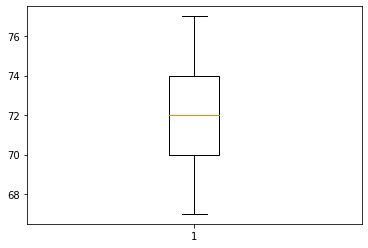

In [18]:
import pandas as pd
import os
from scipy.stats import ttest_1samp
#1 sample t-test
print(os.getcwd())
df = pd.read_excel("Impulsivity.xlsx")
print(df.head())
#hypothesis test
# H0: mu = 70
# HA: mu !=70
#
# Significance level:.013
# test:
#if pvalue<alpha we reject H0 in favor of HA
#
import matplotlib.pyplot as plt
plt.boxplot(df.Imp1)
ttest_1samp(df.Imp1,popmean=70)
#pvalue less than significance level so we reject H0
#we have sufficient evidence the mean is not  70.

8     73
10    76
13    68
16    72
18    75
Name: Imp1, dtype: int64
2     73
4     74
5     77
6     71
11    68
Name: Imp1, dtype: int64


Ttest_indResult(statistic=-0.32972611344447444, pvalue=0.7471820866064731)

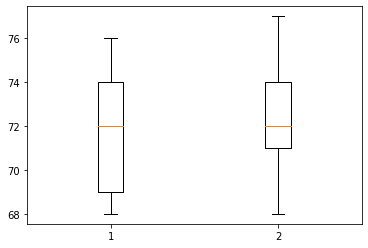

In [24]:
#2 sample t-test or AB test
C1 = df.Imp1[df.TRT == "C"]
L1 = df.Imp1[df.TRT == "L"]
print(C1.head())
print(L1.head())
#box plot to see if any diff between c1, l1
plt.boxplot([C1,L1])
#hypothesis test
#mu_C1: pop mean of trt C1
#mu_L1: pop mean of tretmane L1
#H0 mu_C1=mu_L1
#HA=mu_C1!=mu_L1
#sigif level = .0019
#test stat: ttest_ind
#decisino: if pvalue<sig reject H0

from scipy.stats import ttest_ind
ttest_ind(C1,L1,equal_var=False)
#tvalue=.329
#pvalue=.74
#> so we fieil to reject H0
#concluseion: we have insufficient evidence to claim C1 and L1 differ for mean

In [31]:
#confidence test on proportion
#need a derivation 
import statsmodels.stats.proportion as sp

#survey 1029 people and 732 agree with proposition
#
sp.proportion_confint(732,1029,alpha=.05) #gives 95% confidence interval
#(0.6836843529462662, 0.739056171835075,alpha=.05)
#how to get pvalues 

#95% confidwent the true proportion of people who agree is cotained in 68.3-73.9


(0.6836843529462662, 0.739056171835075)

In [32]:
#2 sample test on proportions
#need derivation...
# Population1: vriginia voters
# Population2: ohio voters
# p1: proportion of vriginia who agree with proporotion
# p2: proportoin of ohio who agree with proposition
#this is a hypothesis test so need H
# H0: p1==p2, people from both populations equal
# HA: p1!=p2
# significacne alpha = 0.0273
#test statistic: statsmodel.stats.proportions_ztest()
#desicion: if p<alpha reject H0
# we survey 1083 virginia ppl and 734 agree with proposition
# we survey 987 ohio ppl and 647 agree with propositin
import statsmodels.stats.proportion as sp
sp.proportions_chisquare([734,648],[1083,987])
#test:1..047
#decisioin: pvalue:.306>alphga so we fail to  reject the null hypothesis
#we have insufficient evidenc to claim the proportion of virginia who agree with proposition differs from
#the proportion of ohio who agree. we dont have enough data. 


(1.047091271837777,
 0.30617794540780324,
 (array([[734., 349.],
         [648., 339.]]),
  array([[723.04637681, 359.95362319],
         [658.95362319, 328.04637681]])))

In [25]:
#1 sided z-test
import statsmodels.stats.proportion as sp
#test if supermajority .66 agree with proposition
# H0 p=0.66
# HA p!=.66
# Significance level .003 not .05
# test stat ztest
# dewcision reule if pvalue<.003 then reject H0
# data: survey 2048 and 1603 agree with proposition
#
sp.proportions_ztest(1603,2048, value=.66)
#ztest is 13.66 this is not a pvalue, pvalue = 2.5e-41 which is less than .003
#we rejetc H0 so we have sufficient evidence to clam teh proportion of people who agree is not .66

sp.proportions_ztest(1603,2048, value=.66,alternative='larger')
#almost same pvalue


(13.466206207830021, 1.2362364618305403e-41)

In [40]:
import pyjags
#2 sample chi-square test, we have a dataset with voters from 2 places, does this pass the 66% supermajority 
#test? with a significance level of 2.7%? 
# pop1: virginia
# pop2: ohio
# H0 p1=p2
# HA p1!=p2
#signifcane level =alpha .0273
# test stat proportions_ztest()
#
# decision rule,  if pvalue< alpha.0273 reject h0
# 1) survey 1083 virginia and 734 agree
# 2) survey 987 and 648 agree 
#
#
sp.proportions_chisquare([734,648],[1083,987] )





In [ ]:
#1.05 is zvalue, pvalue .306
#pvalue > .0273 fail to reject H0
#we have insufficent evidence to claim teh prooprotion virginia who agree differ with proportion of ohio who agree
#does it mean same? no, we dont have enough information. 
#


In [59]:
import pyjags
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
np.set_printoptions(precision=1)
N = 500
a = 70
b = 4
sigma = 50
x = np.random.uniform(0, 100, size=N)
y = np.random.normal(a + x*b, sigma, size=N)
code = '''
model {
for (i in 1:N) {
y[i] ~ dnorm(alpha + beta * x[i], tau)
}
alpha ~ dunif(-1e3, 1e3)
beta ~ dunif(-1e3, 1e3)
tau <- 1 / sigma^2
sigma ~ dgamma(1e-4, 1e-4)
}
'''
model = pyjags.Model(code, data=dict(x=x, y=y, N=N), chains=4)
samples = model.sample(5000, vars=['alpha', 'beta', 'sigma'])
def summary(samples, varname, p=95):
    values = samples[varname]
    ci = np.percentile(values, [100-p, p])
    print('{:<6} mean = {:>5.1f}, {}% credible interval [{:>4.1f} {:>4.1f}]'.format(
    varname, np.mean(values), p, *ci))
for varname in ['alpha', 'beta', 'sigma']:
    summary(samples, varname)

adapting: iterations 4000 of 4000, elapsed 0:00:01, remaining 0:00:00
sampling: iterations 20000 of 20000, elapsed 0:00:04, remaining 0:00:00
alpha  mean =  64.3, 95% credible interval [57.3 71.4]
beta   mean =   4.0, 95% credible interval [ 3.9  4.1]
sigma  mean =  49.4, 95% credible interval [46.9 52.0]


In [ ]:
#pyjags 2 means https://agabrioblog.onrender.com/jags/comparing-two-populations-jags/comparing-two-populations-jags/
import pyjags
import numpy as np

nA=60
nB=40
muA=105
muB=77.5
sigma=3
yA=rnorm()


 

In [55]:

#bayesian 2 means. Take difference and create a credible interval or for hypothesis testing
#this is the credible interval approach
#
# A manufactfurere is interested in the strength of welds formed by 2 different machines. 
# mu_1 is the mean strength from machine1
# mu_2 is the mean strength from machine2
# is the difference between the 2 means significant? 
#
import pyjags
import numpy as np

x1 = np.array([ 125.2, 131.1, 121.5, 122.3, 119.3,
         123.5, 130.2, 122.9, 129.2, 127.1 ])

# Dataset 2
x2 = np.array([ 118.6, 122.2, 110.5, 118.8,
         115.9, 116.5, 114.5, 118.0,
         113.2, 119.0, 117.7, 116.7 ])

n1 = x1.shape[0]
n2 = x2.shape[0]
print(n1,n2,x1[3],x2[5])

mod1 = '''model{
  # Sample from population 1
  for( i in 1:n1 ){
    x1[i] ~ dnorm( mu1, sig1 )
  }
  # Sample from population 2
  for( i in 1:n2 ){
    x2[i] ~ dnorm( mu2, sig2 )
  }
  # Create the difference
  mudiff1 <- mu1 - mu2
  # Prior information
  mu1 ~ dnorm( 120, 1/100 )
  sig1 ~ dgamma( 1, 1 )
  mu2 ~ dnorm( 120, 1/100 )
  sig2 ~ dgamma( 1, 1 )
  }'''
#can be a list or a dict
inits = {"mu1":1, "sig1":1, "mu2":1, "sig2":1}
print(type(inits),inits)
N=1000
j = pyjags.Model(code=mod1, data=dict(x1=x1,x2=x2, n1=n1,n2=n2), init=inits, chains=2)
j.update()

10 12 122.3 116.5
<class 'dict'> {'mu1': 1, 'sig1': 1, 'mu2': 1, 'sig2': 1}
